# Average Hourly Activity Analysis

In [50]:
#Import relevant packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
import seaborn as sns
sns.set()

In [51]:
df1 = pd.read_csv("Parasteadoda red ligt and DD_LD_only.csv")
df1["Light"].replace(" ", np.nan, inplace= True)
df1.dropna(subset = ["Light"], inplace= True)
df1.head()

,index,Light,s2,s3,s4,s5,s6,s7,s8,s9,...,s17,s18,s19,s20,s21,s22,s23,s24,s25,s26
901,2023-10-06 15:01:00,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,...,0.0,3.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,6.0
902,2023-10-06 15:02:00,1.0,9.0,0.0,0.0,7.0,0.0,0.0,1.0,2.0,...,0.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0
903,2023-10-06 15:03:00,1.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,7.0,...,0.0,1.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,4.0
904,2023-10-06 15:04:00,1.0,4.0,0.0,0.0,6.0,0.0,0.0,4.0,4.0,...,0.0,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0
905,2023-10-06 15:05:00,1.0,2.0,0.0,0.0,10.0,0.0,0.0,2.0,3.0,...,0.0,4.0,2.0,2.0,0.0,0.0,6.0,0.0,0.0,1.0


In [52]:
df1["index"]= pd.to_datetime(df1["index"])
#Add new time elapsed column
days = pd.to_datetime(df1["index"])- pd.to_datetime(df1.at[901, "index"])
df1["days_since"] = days
df1 = df1.set_index("index")

In [53]:
df1

,Light,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,s18,s19,s20,s21,s22,s23,s24,s25,s26,days_since
index,,,,,,,,,,,,,,,,,,,,,
2023-10-06 15:01:00,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,4.0,0.0,...,3.0,2.0,1.0,0.0,2.0,2.0,0.0,0.0,6.0,0 days 00:00:00
2023-10-06 15:02:00,1.0,9.0,0.0,0.0,7.0,0.0,0.0,1.0,2.0,0.0,...,2.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0 days 00:01:00
2023-10-06 15:03:00,1.0,3.0,0.0,0.0,2.0,2.0,0.0,1.0,7.0,0.0,...,1.0,3.0,1.0,0.0,0.0,4.0,0.0,0.0,4.0,0 days 00:02:00
2023-10-06 15:04:00,1.0,4.0,0.0,0.0,6.0,0.0,0.0,4.0,4.0,4.0,...,2.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,4.0,0 days 00:03:00
2023-10-06 15:05:00,1.0,2.0,0.0,0.0,10.0,0.0,0.0,2.0,3.0,4.0,...,4.0,2.0,2.0,0.0,0.0,6.0,0.0,0.0,1.0,0 days 00:04:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-13 17:01:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7 days 02:00:00
2023-10-13 17:02:00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,7 days 02:01:00
2023-10-13 17:03:00,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,7 days 02:02:00


In [54]:
#Plan
    #Take average activity across the columns (average spider activity at each time point) --> new df
    #Then plot - bar plot where x = time, y = activity count
    #In comparison, find moving average across the time values --> new df, if necessary
    #Plot - bar plot where x = time, y = activity count

In [59]:
df_avg = pd.DataFrame(df1.iloc[:,1:26].mean(axis = 1))
df_avg

,0
index,
2023-10-06 15:01:00,1.24
2023-10-06 15:02:00,1.32
2023-10-06 15:03:00,1.28
2023-10-06 15:04:00,1.28
2023-10-06 15:05:00,1.52
...,...
2023-10-13 17:01:00,0.20
2023-10-13 17:02:00,0.20
2023-10-13 17:03:00,0.84


<Axes: xlabel='index', ylabel='Light'>

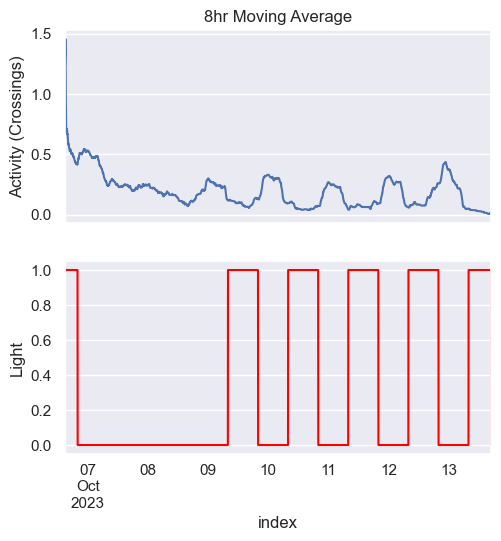

In [56]:
roll = df_avg.rolling(window = "8H", axis = 0).mean()
plot, sub = plt.subplots(2, sharex=True)
plot.set_size_inches(5.5, 5.5)
roll.plot(color='b', title = "8hr Moving Average", ylabel = "Activity (Crossings)", legend = False, ax=sub[0])
df1['Light'].plot.line(color='red', ylabel = "Light", ax=sub[1])
#sub[0].fill_between(x= df1.index, y1=df1.Light, y2=0, where=(df1.Light<0), interpolate = True, facecolor= "red", alpha=0.5)

,Average Spider Activity
index,
2023-10-06 15:01:00,1.240000
2023-10-06 15:02:00,1.280000
2023-10-06 15:03:00,1.280000
2023-10-06 15:04:00,1.280000
2023-10-06 15:05:00,1.328000
...,...
2023-10-13 17:01:00,0.018000
2023-10-13 17:02:00,0.018417
2023-10-13 17:03:00,0.020167


<Axes: title={'center': '8hr Moving Average'}, xlabel='Date', ylabel='Activity (Crossings)'>

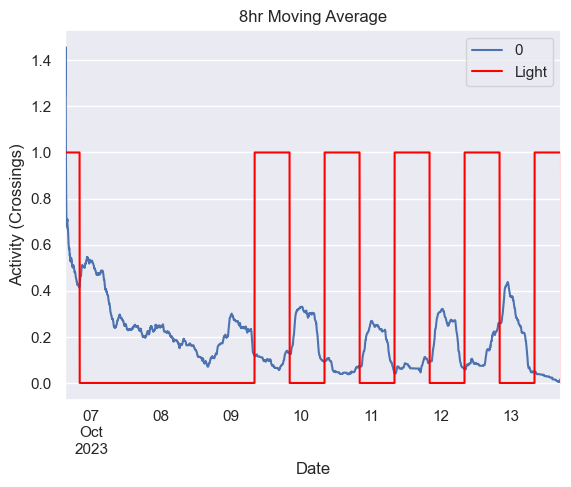

In [64]:
plot.set_size_inches(4,10)
roll.rename(columns ={0:"Average Spider Activity"})
roll.plot(color='b', title = "8hr Moving Average", ylabel = "Activity (Crossings)", xlabel = "Date", legend = True)
df1['Light'].plot.line(color='red', xlabel = "Date", legend = True)